<a href="https://colab.research.google.com/github/shila121/NLP_ml/blob/main/tweets_sentiments_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sentimental analysis from Twitter data

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.# load the dataset
dataset = pd.read_csv('tweets.csv',encoding = 'ISO-8859-1')
print(dataset.head())
print(dataset.columns)
print(dataset.shape)

   Unnamed: 0  X  ... isRetweet  retweeted
0           1  1  ...      True      False
1           2  2  ...      True      False
2           3  3  ...      True      False
3           4  4  ...      True      False
4           5  5  ...      True      False

[5 rows x 16 columns]
Index(['Unnamed: 0', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')
(14940, 16)


In [9]:
# generate word frequency
def gen_freq(text):
  word_list = []

  for i in text.split():
    word_list.extend(i)

  word_freq = pd.Series(word_list).value_counts()
  # print(word_freq[:20])
  return word_freq


gen_freq(dataset.text.str)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
cashiers                       1
https://t.co/D82oM5bnJM        1
post-demonetization.           1
closed.Don't                   1
memory...                      1
Length: 19601, dtype: int64

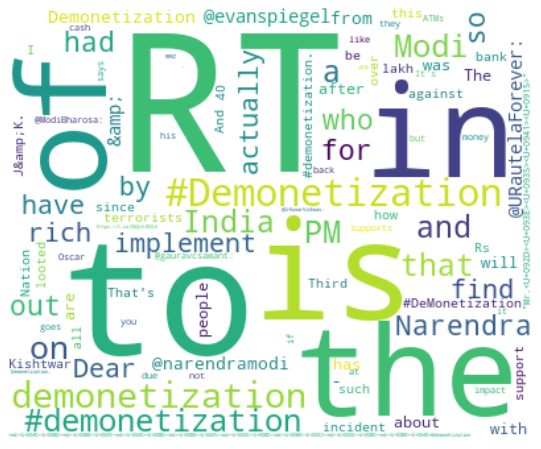

In [10]:
# 3.EDA using word clouds

from wordcloud import WordCloud

# generate word frequencies
word_freq = gen_freq(dataset.text.str)

# generate word cloud
wc = WordCloud(width = 400,height = 330,max_words = 100,background_color = 'white').generate_from_frequencies(word_freq)

plt.figure(figsize = (12,8))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [12]:
# 4.text cleaning

import re

def clean_text(text):

  # remove RT
  text = re.sub(r'RT','',text)

  #Fix &
  text = re.sub(r'&amp;','&', text)
    
  #Remove punctuations
  text = re.sub(r'[?!.;:,#@-]', '', text)

  # convert to lower case to maintain consistency
  text = text.lower()

  return text

{'can', 'of', 'there', 'should', 'get', 'other', 'r', 'off', "don't", 'no', 'each', "they'll", 'if', 'could', 'otherwise', 'did', 'their', 'very', "he'd", 'too', 'these', 'between', 'just', 'you', 'doing', "couldn't", "she's", 'being', 'in', 'ever', 'itself', 'only', 'same', "shouldn't", 'he', "haven't", 'they', "you'd", 'before', "it's", "you're", 'while', 'themselves', 'here', 'also', 'because', "you'll", "shan't", 'what', 'for', 'down', 'shall', 'i', "there's", "we're", "won't", 'from', 'herself', "he'll", 'ours', 'who', 'about', "hasn't", 'do', 'not', 'where', 'ought', 'most', "mustn't", 'further', 'it', 'all', 'under', 'nor', 'are', "that's", "can't", 'to', 'its', 'so', "why's", 'however', 'how', 'her', 'out', 'were', 'was', 'yours', 'but', 'an', 'have', 'more', 'having', 'than', 'until', "we'd", "isn't", "they'd", "we've", "wouldn't", 'himself', 'that', "wasn't", 'few', 'as', 'his', 'has', 'your', 'the', "he's", "here's", 'http', 'me', "who's", 'else', 'through', 'myself', 'and',

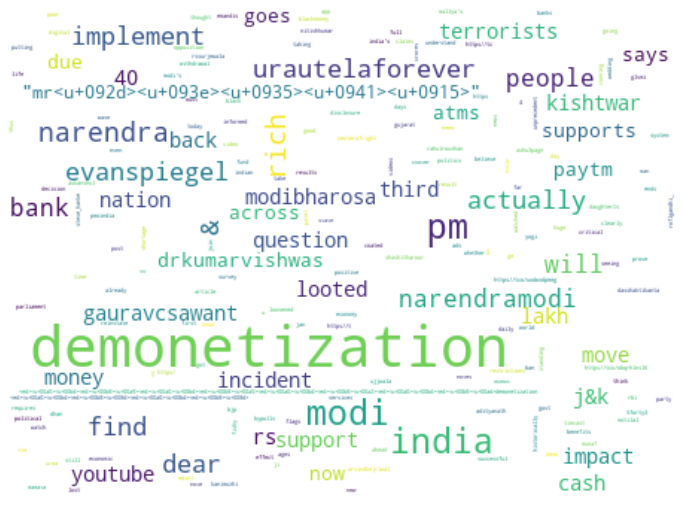

In [16]:
# 5.stop words removal
from wordcloud import STOPWORDS
print(STOPWORDS)

# step 1:clean the texts
text = dataset.text.apply(lambda x:clean_text(x))

# step 2:generate word frquency
word_freq = gen_freq(text.str) * 100

# step 3:remove stopwords
word_freq = word_freq.drop(labels = STOPWORDS,errors = 'ignore')

# step 4:generate word cloud
wc = WordCloud(width=450,height = 330,max_words = 200,background_color = 'white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()